In [6]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os

# Specify a directory for each genre of music
jazz_directory = '/content/drive/MyDrive/Data/genres_original/jazz'
rock_directory = '/content/drive/MyDrive/Data/genres_original/rock'
classical_directory = '/content/drive/MyDrive/Data/genres_original/classical'

# Function to extract MFCC features from an audio file
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path)
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        return np.mean(mfccs, axis=1)
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Function to load data for a specific genre
def load_genre_data(genre_audio_files, genre_label):
    data, labels = [], []
    for file_path in genre_audio_files:
        features = extract_features(file_path)
        if features is not None:  # Проверка наличия признаков
            data.append(features)
            labels.append(genre_label)
    return data, labels

# Function to get a list of audio files in a specified directory
def get_audio_files(directory):
    audio_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Assume your audio files have the extension .wav
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
    return audio_files

# Get a list of audio files for each genre
jazz_audio_files = get_audio_files(jazz_directory)
rock_audio_files = get_audio_files(rock_directory)
classical_audio_files = get_audio_files(classical_directory)

# Load and retrieve attributes for each genre as before
jazz_data, jazz_labels = load_genre_data(jazz_audio_files, 'jazz')
rock_data, rock_labels = load_genre_data(rock_audio_files, 'rock')
classical_data, classical_labels = load_genre_data(classical_audio_files, 'classical')

# Find the minimum length of MFCC features among all audio files
min_mfcc_length = min(len(features) for features in jazz_data + rock_data + classical_data)

# Trim features to minimum length
jazz_data = [features[:min_mfcc_length] for features in jazz_data]
rock_data = [features[:min_mfcc_length] for features in rock_data]
classical_data = [features[:min_mfcc_length] for features in classical_data]

# Combine data and labels for all genres
data = np.vstack([jazz_data, rock_data, classical_data])
labels = np.hstack([jazz_labels, rock_labels, classical_labels])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

# Train the classification model
model = SVC()
model.fit(X_train, y_train)

# Evaluate the accuracy of the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")


<ipython-input-6-9a04782bc74c>:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/drive/MyDrive/Data/genres_original/jazz/jazz.00054.wav: 
Model accuracy: 0.7666666666666667


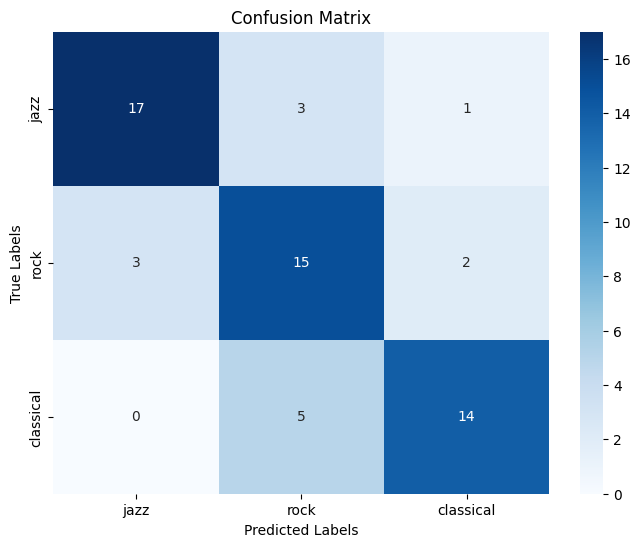

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for the test set
y_pred = model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels for the confusion matrix
class_labels = ['jazz', 'rock', 'classical']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
